In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

# Simulation
+ JSAP version: 547
+ Energy: 2 MeV
+ Geo: 5 kt
+ Simulation: (0,0,z): z from -12 to 12 m, step 0.2 m
+ 2k events per point

# Result by hit and time info

/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in less


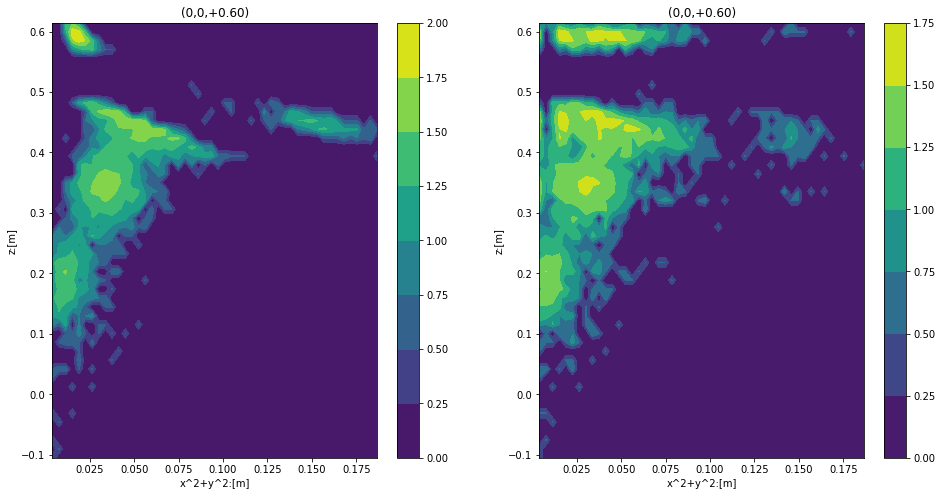

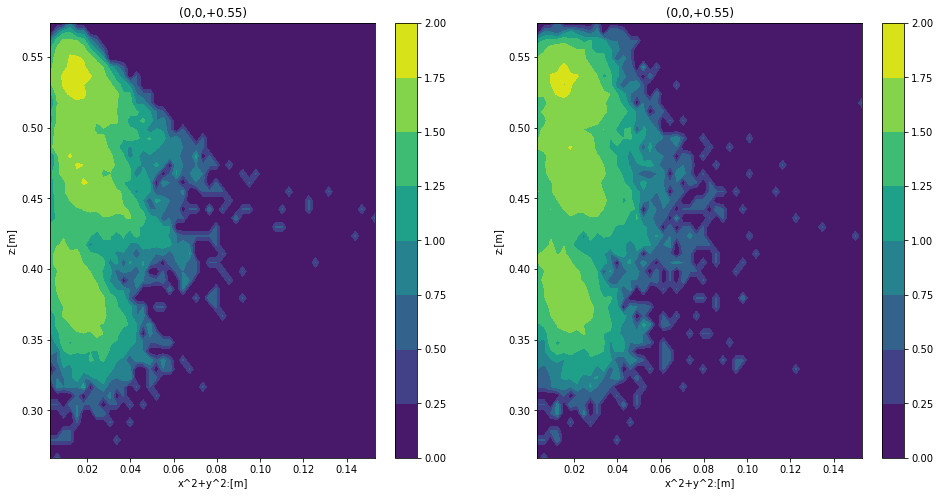

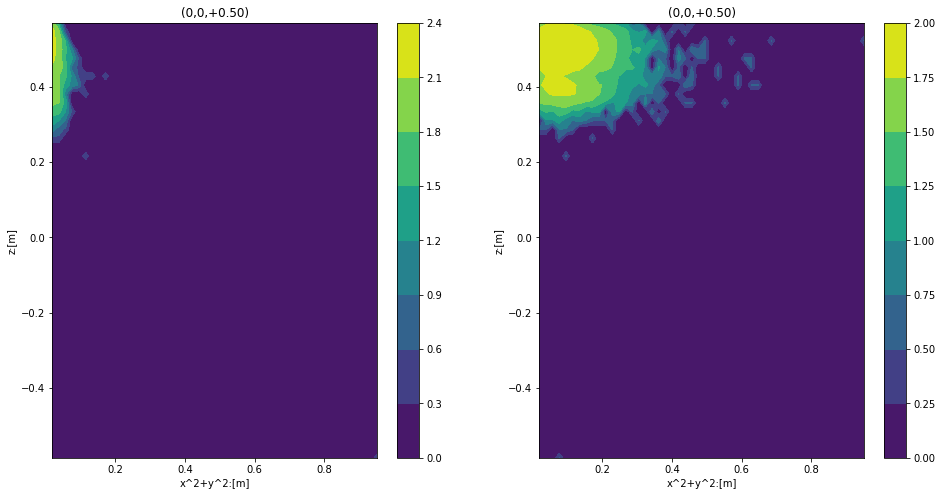

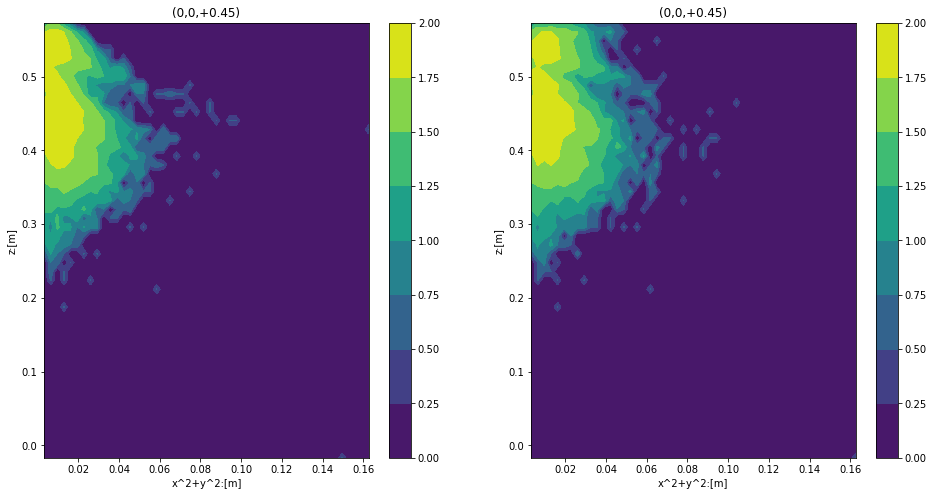

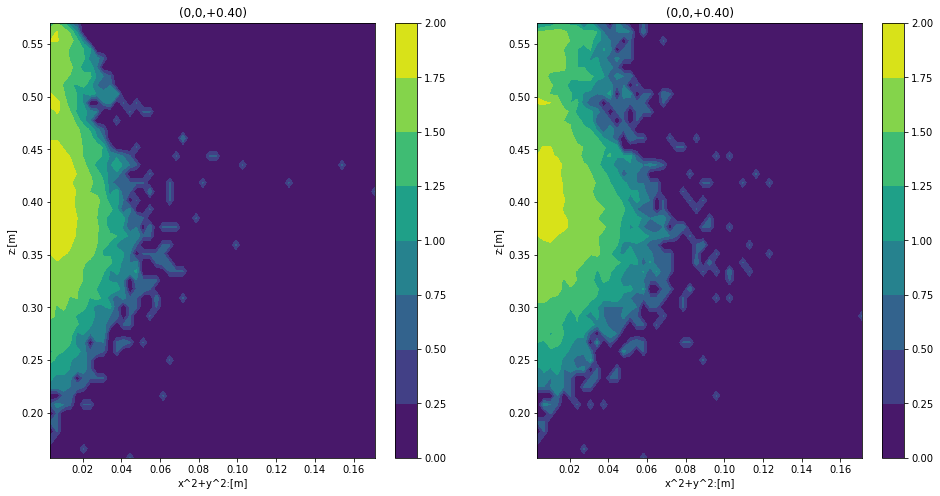

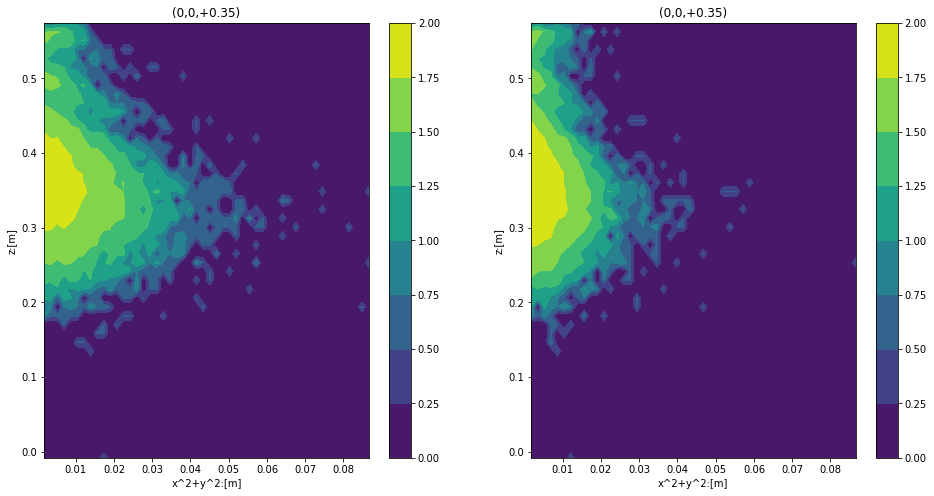

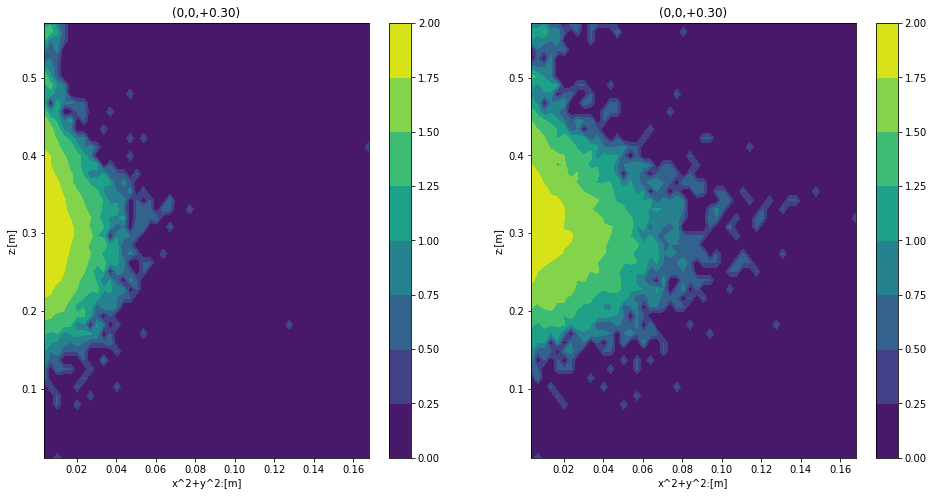

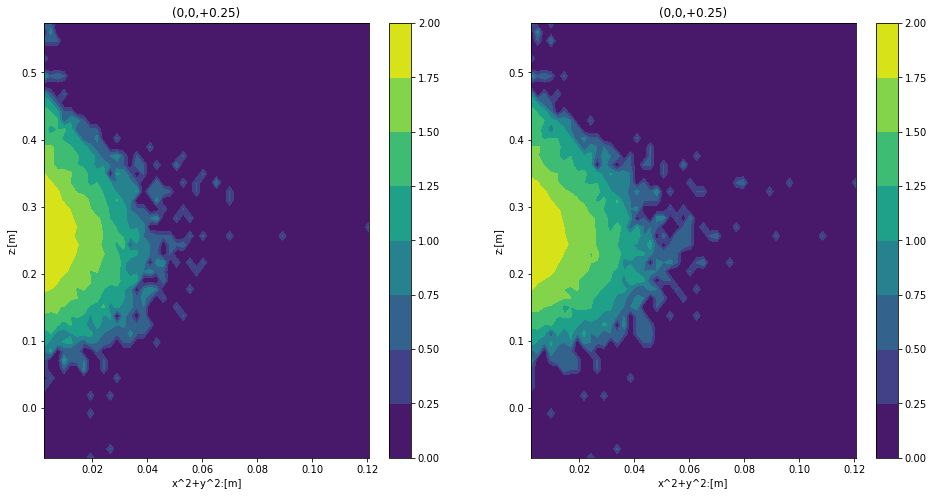

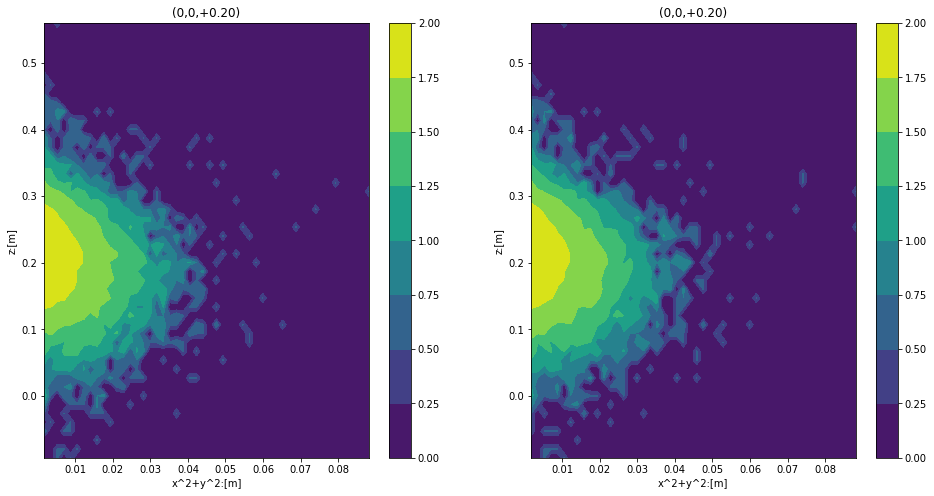

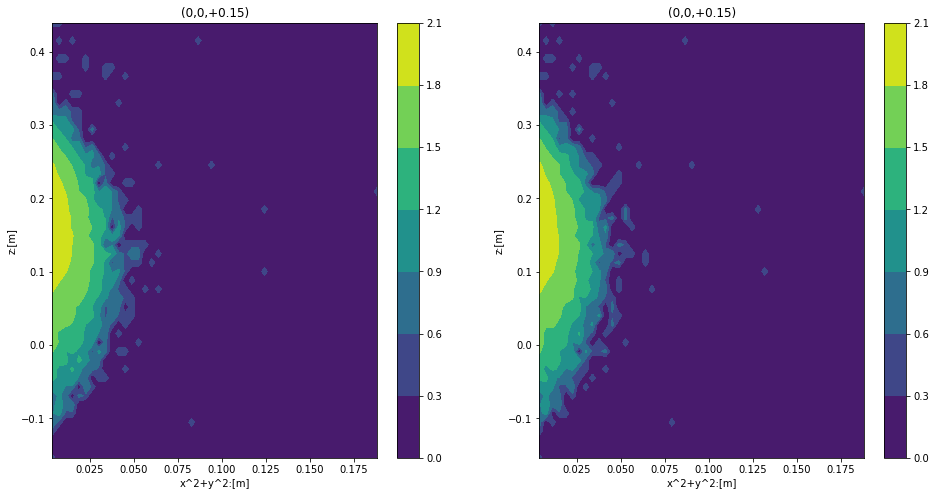

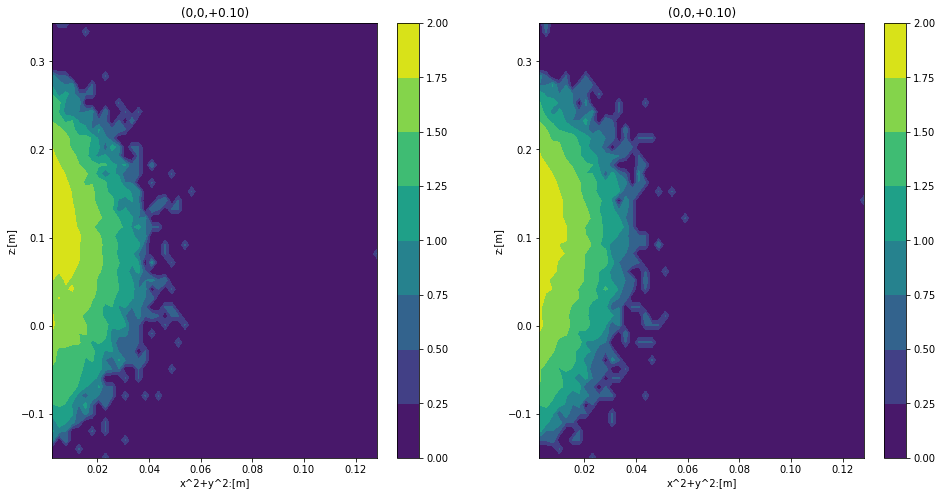

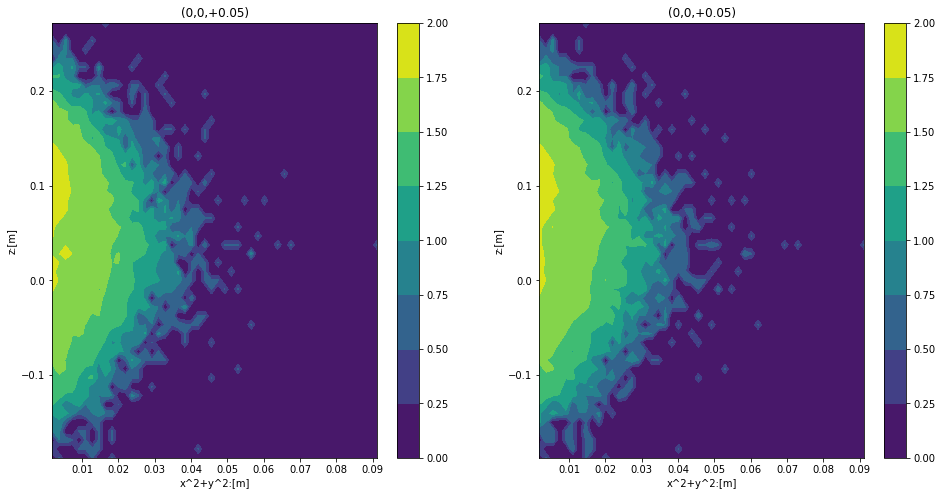

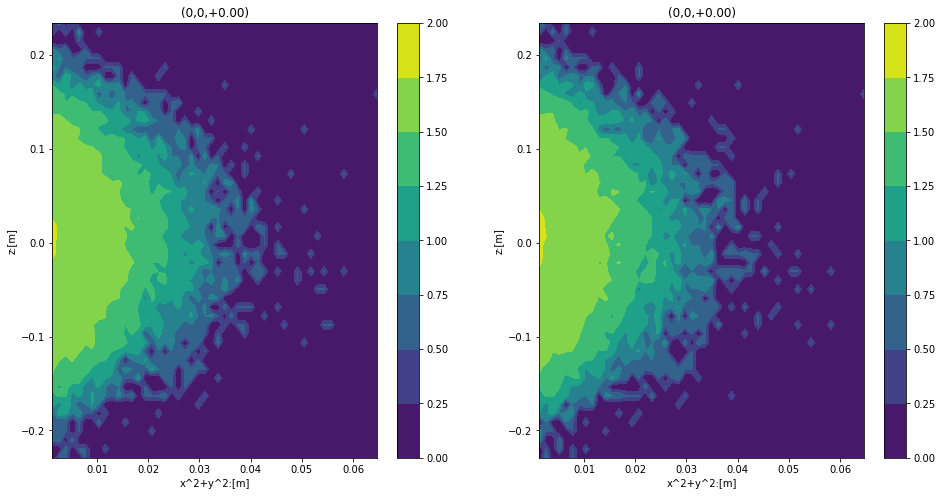

In [6]:
import os
def readfile(path):
    #path = r'../result_1t_1MeV_new'
    filenames=os.listdir(path)
    radius = np.arange(0.6001,-0.60,-0.01)
    data = []

    E_total = []
    x_total = []
    y_total = []
    z_total = []
    E_truth = []
    x_truth = []
    y_truth = []
    z_truth = []
    for index,i in enumerate(radius):
        filenames = os.listdir(path)
        for j in filenames:
            #print('%+.2f' % i)
            if ('%+.2f' % i) in j:
                #print(os.path.join(path, j))
                h = tables.open_file(os.path.join(path, j),'r')
                recondata = h.root.Recon
                E = recondata[:]['E_sph']
                taud = recondata[:]['tau_d']
                x = recondata[:]['x_sph']
                xt = recondata[:]['x_truth']
                y = recondata[:]['y_sph']
                yt = recondata[:]['y_truth']
                z = recondata[:]['z_sph']
                zt = recondata[:]['z_truth']
                xl = recondata[:]['x']
                h.close()
                E_total = np.hstack((E_total, E))
                x_total = np.hstack((x_total, x))
                y_total = np.hstack((y_total, y))
                z_total = np.hstack((z_total, z))
                x_truth = np.hstack((x_truth, np.zeros_like(x)))
                y_truth = np.hstack((y_truth, np.zeros_like(y)))
                z_truth = np.hstack((z_truth, radius[index]*np.ones_like(z)))
                
    return x,y,z,xt,yt,zt,x_total,y_total,z_total,x_truth,y_truth,z_truth

x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
x_ax = []
y_ax = []
z_ax = []

cnt = 0

x,y,z,xt,yt,zt,x_total,y_total,z_total,x_truth,y_truth,z_truth = readfile('../result_1t_2MeV')
x1,y1,z1,xt1,yt1,zt1,x_total1,y_total1,z_total1,x_truth1,y_truth1,z_truth1 = readfile('../result_1t_2MeV_1st')

for i in np.arange(0.6001,-0.60,-0.01):
    index = ((np.abs(z_truth-i)<0.005) & \
             ((np.array(x_total)**2+np.array(y_total)**2)<2) & \
            (~np.isnan(x_total)))
    if np.min(np.abs(i - np.arange(0.6001,0.00,-0.05)))<1e-3:
        cnt = cnt+1
        plt.figure(figsize = (16,8), num=cnt)
        plt.subplot(1,2,1)
        r1 = x_total[index]**2 + y_total[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total[index]), bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.log(np.transpose(H1)+1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)
        
        plt.subplot(1,2,2)
        r1 = x_total1[index]**2 + y_total1[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total[index]), bins=50)
        X1, Y1 = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.log(np.transpose(H1)+1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)
        plt.savefig('1MeV%d.png' % cnt)
    plt.show()

    x_ax.append(x_truth[index][0])
    y_ax.append(y_truth[index][0])
    z_ax.append(z_truth[index][0])
    x_mean.append(np.mean(np.abs(x_total[index]-x_truth[index])))
    y_mean.append(np.mean(np.abs(y_total[index]-y_truth[index])))
    z_mean.append(np.mean(np.abs(z_total[index]-z_truth[index])))
    x_std.append(np.std(x_total[index]-x_truth[index]))
    y_std.append(np.std(y_total[index]-y_truth[index]))
    z_std.append(np.std(z_total[index]-z_truth[index]))


In [164]:
print(x_total.shape)
print(x_total1.shape)

(962172,)
(962172,)


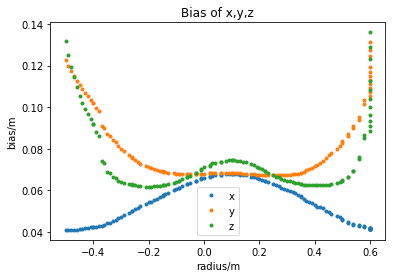

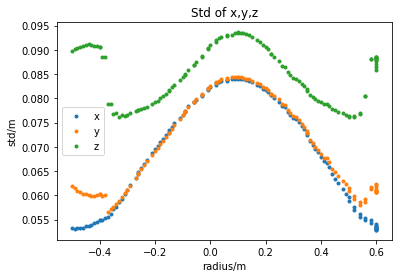

In [109]:
plt.plot(z_ax, x_mean,'.')
plt.plot(z_ax, y_mean,'.')
plt.plot(z_ax, z_mean,'.')

plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('bias/m')
plt.title('Bias of x,y,z')
plt.show()
plt.plot(z_ax, x_std,'.')
plt.plot(z_ax, y_std,'.')
plt.plot(z_ax, z_std,'.')
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('std/m')
plt.title('Std of x,y,z')
plt.show()

/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in less
/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in less


[0.60009766 0.60009766 0.60009766 0.60009766 0.60009766 0.60009766
 0.60009766 0.60009766 0.60009766 0.60009766 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203
 0.59033203 0.59033203 0.59033203 0.59033203 0.59033203 0.5903

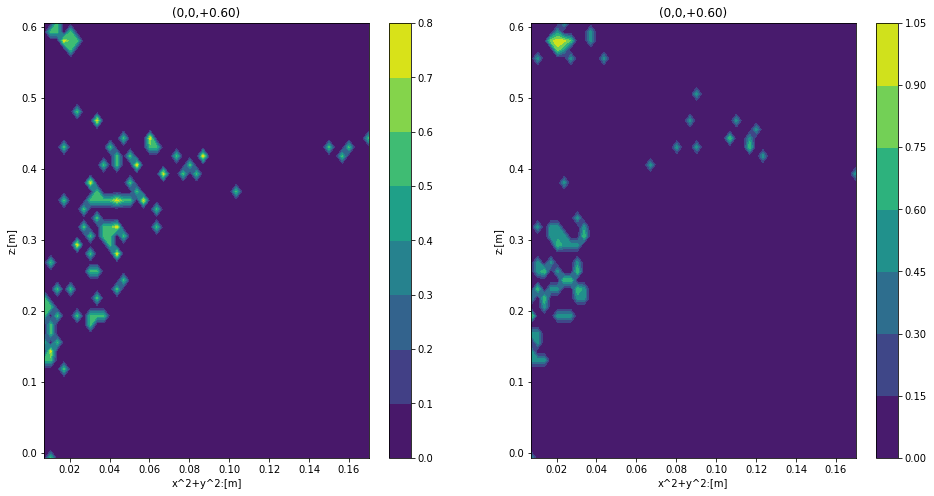

[0.56005859 0.56005859 0.56005859 ... 0.55029297 0.55029297 0.55029297]
[0.56005859 0.56005859 0.56005859 ... 0.55029297 0.55029297 0.55029297]


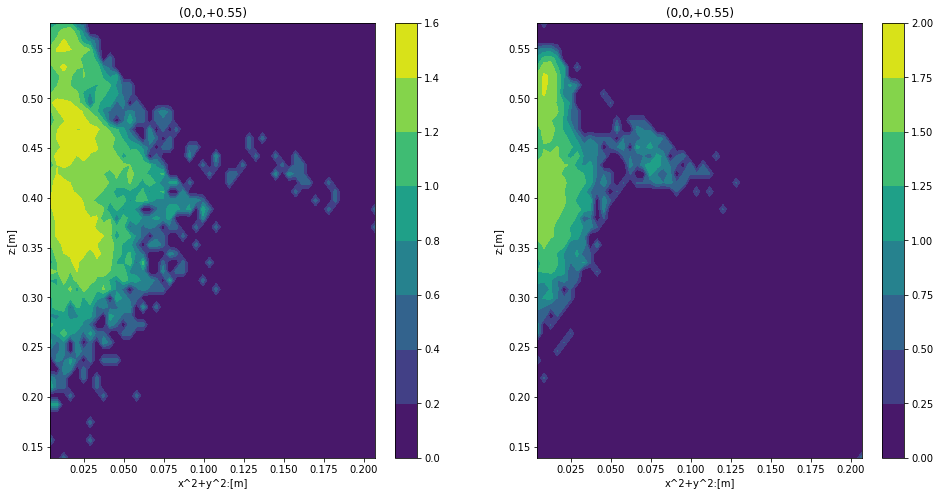

[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0.5 0.5 0.5 ... 0.5 0.5 0.5]


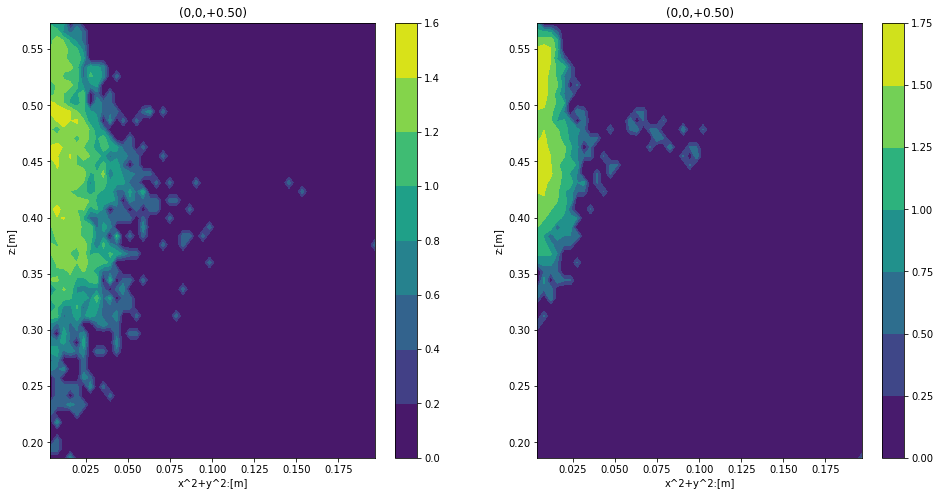

[0.45019531 0.45019531 0.45019531 ... 0.44018555 0.44018555 0.44018555]
[0.45019531 0.45019531 0.45019531 ... 0.44018555 0.44018555 0.44018555]


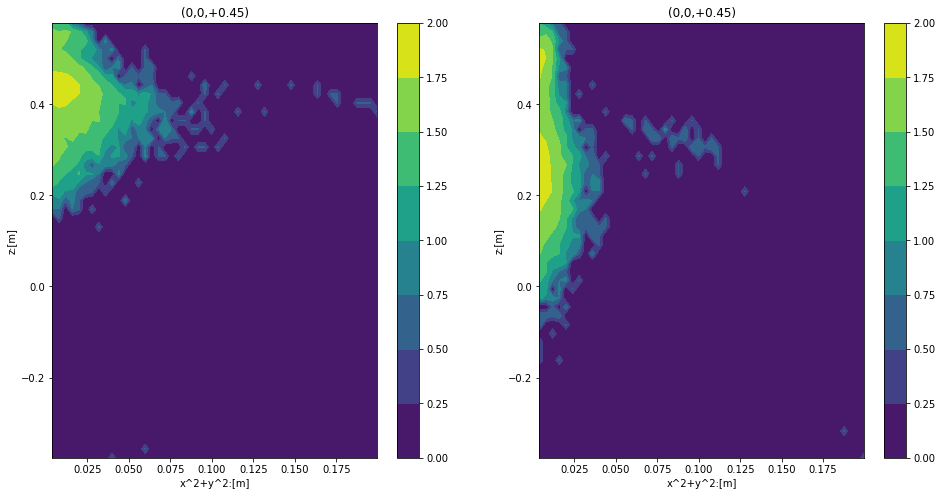

[0.40014648 0.40014648 0.40014648 ... 0.39013672 0.39013672 0.39013672]
[0.40014648 0.40014648 0.40014648 ... 0.39013672 0.39013672 0.39013672]


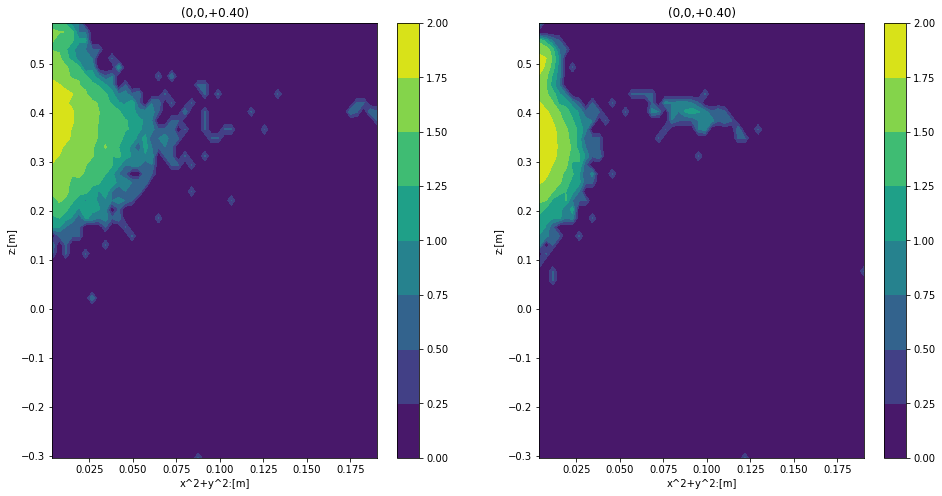

[0.35009766 0.35009766 0.35009766 ... 0.35009766 0.35009766 0.35009766]
[0.35009766 0.35009766 0.35009766 ... 0.35009766 0.35009766 0.35009766]


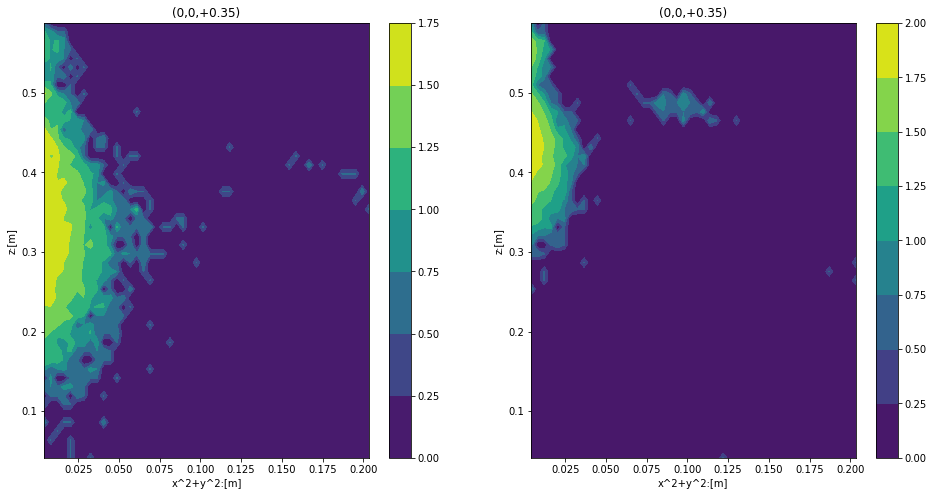

[0.31005859 0.31005859 0.31005859 ... 0.30004883 0.30004883 0.30004883]
[0.31005859 0.31005859 0.31005859 ... 0.30004883 0.30004883 0.30004883]


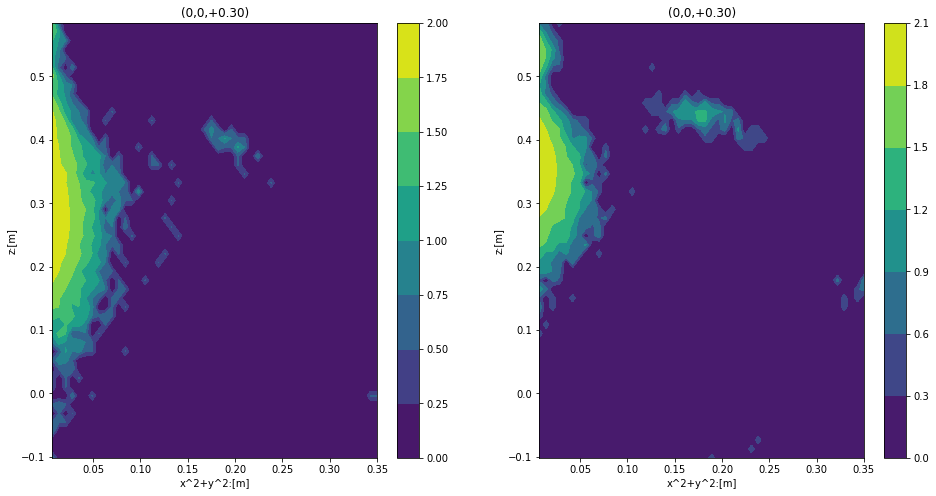

[0.26000977 0.26000977 0.26000977 ... 0.2401123  0.2401123  0.2401123 ]
[0.26000977 0.26000977 0.26000977 ... 0.2401123  0.2401123  0.2401123 ]


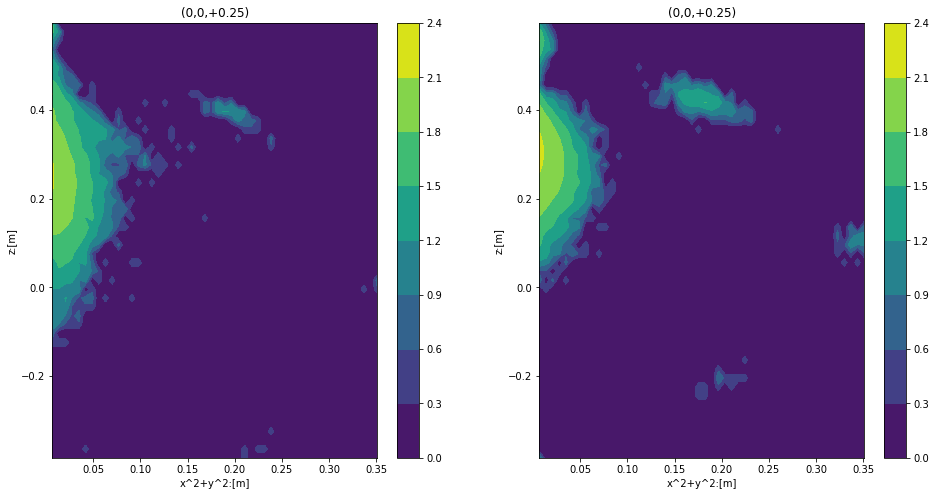

[0.21008301 0.21008301 0.21008301 ... 0.20007324 0.20007324 0.20007324]
[0.21008301 0.21008301 0.21008301 ... 0.20007324 0.20007324 0.20007324]


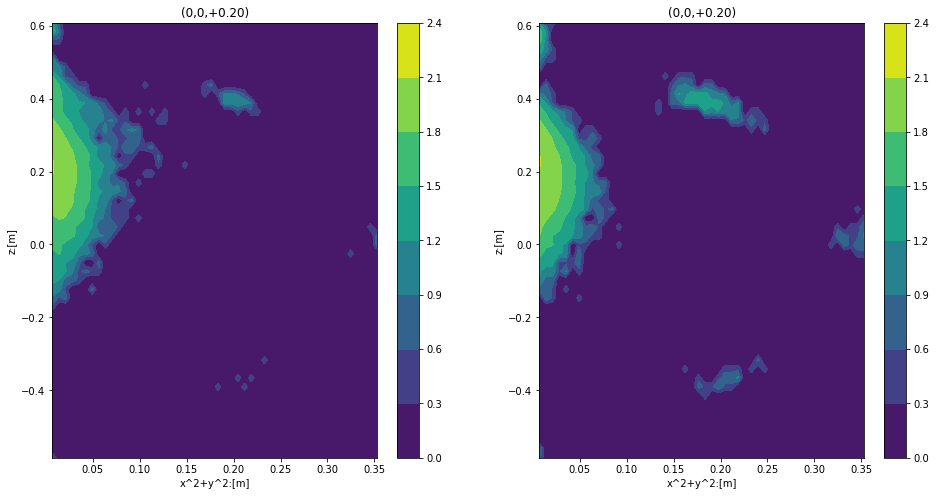

[0.15014648 0.15014648 0.15014648 ... 0.14013672 0.14013672 0.14013672]
[0.15014648 0.15014648 0.15014648 ... 0.14013672 0.14013672 0.14013672]


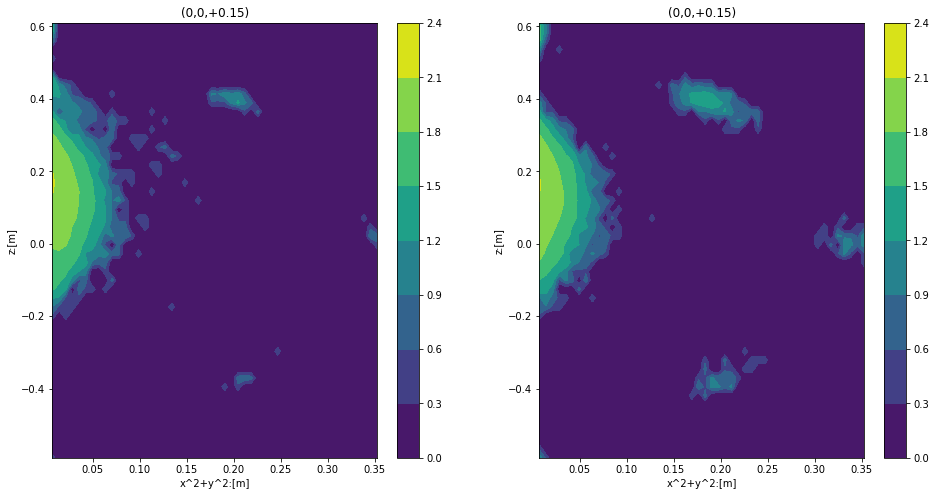

[0.10009766 0.10009766 0.10009766 ... 0.10009766 0.10009766 0.10009766]
[0.10009766 0.10009766 0.10009766 ... 0.10009766 0.10009766 0.10009766]


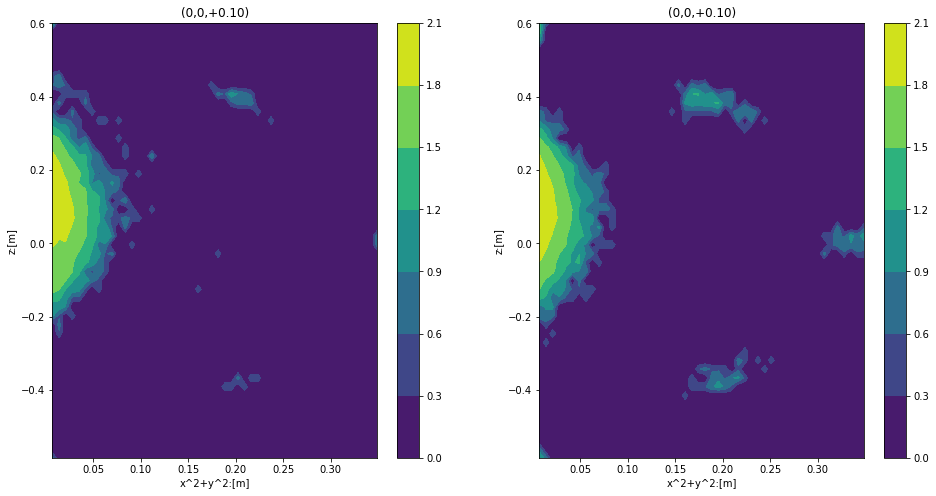

[0.06008911 0.06008911 0.06008911 ... 0.0401001  0.0401001  0.0401001 ]
[0.06008911 0.06008911 0.06008911 ... 0.0401001  0.0401001  0.0401001 ]


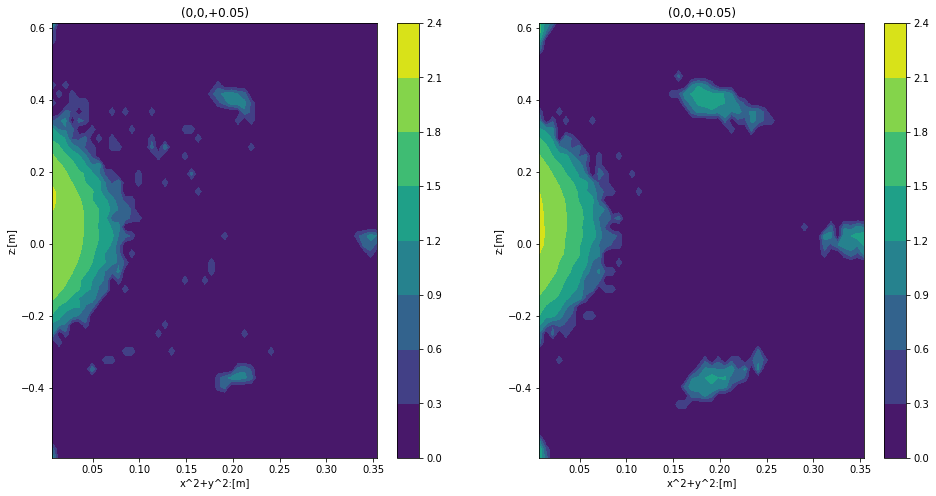

[0.00010002 0.00010002 0.00010002 ... 0.00010002 0.00010002 0.00010002]
[0.00010002 0.00010002 0.00010002 ... 0.00010002 0.00010002 0.00010002]


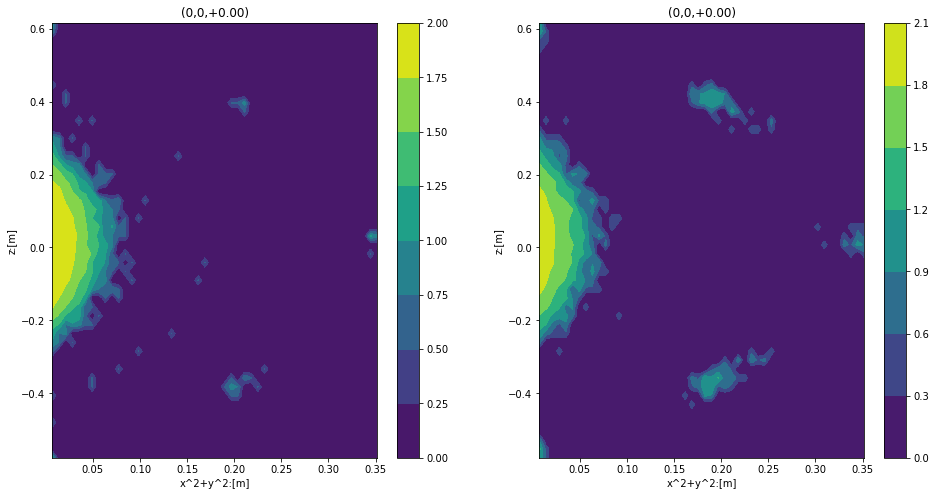

In [172]:
import os
def readfile(path):
    #path = r'../result_1t_1MeV_new'
    filenames=os.listdir(path)
    radius = np.arange(0.6001,-0.60,-0.01)
    data = []

    E_total = []
    x_total = []
    y_total = []
    z_total = []
    E_truth = []
    x_truth = []
    y_truth = []
    z_truth = []
    for index,i in enumerate(radius):
        filenames = os.listdir(path)
        for j in filenames:
            #print('%+.2f' % i)
            if ('%+.2f' % i) in j:
                #print(os.path.join(path, j))
                h = tables.open_file(os.path.join(path, j),'r')
                recondata = h.root.Recon
                E = recondata[:]['E_sph']
                taud = recondata[:]['tau_d']
                x = recondata[:]['x_sph']
                xt = recondata[:]['x_truth']
                y = recondata[:]['y_sph']
                yt = recondata[:]['y_truth']
                z = recondata[:]['z_sph']
                zt = recondata[:]['z_truth']
                xl = recondata[:]['x']
                h.close()
                E_total = np.hstack((E_total, E))
                x_total = np.hstack((x_total, x))
                y_total = np.hstack((y_total, y))
                z_total = np.hstack((z_total, z))
                x_truth = np.hstack((x_truth, np.zeros_like(x)))
                y_truth = np.hstack((y_truth, np.zeros_like(y)))
                z_truth = np.hstack((z_truth, radius[index]*np.ones_like(z)))
                
    return x,y,z,xt,yt,zt,x_total,y_total,z_total,x_truth,y_truth,z_truth

x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
x_ax = []
y_ax = []
z_ax = []

cnt = 0

x,y,z,xt,yt,zt,x_total,y_total,z_total,x_truth,y_truth,z_truth = readfile('../result_1t_1MeV_new')
x1,y1,z1,xt1,yt1,zt1,x_total1,y_total1,z_total1,x_truth1,y_truth1,z_truth1 = readfile('../result_1t_1MeV')

for i in np.arange(0.6001,-0.60,-0.01):
    index = ((np.abs(z_truth-i)<0.01) & \
             ((np.array(x_total)**2+np.array(y_total)**2)<2) & \
            (~np.isnan(x_total)))
    index1 = ((np.abs(z_truth1-i)<0.01) & \
             ((np.array(x_total1)**2+np.array(y_total1)**2)<2) & \
            (~np.isnan(x_total1)))
    if np.min(np.abs(i - np.arange(0.6001,0.00,-0.05)))<1e-3:
        cnt = cnt+1
        plt.figure(figsize = (16,8), num=cnt)
        plt.subplot(1,2,1)
        r1 = x_total[index]**2 + y_total[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total[index]), bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.log(np.transpose(H1)+1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)
        print(z_truth[index])
        print(z_truth1[index1])
        plt.subplot(1,2,2)
        r1 = x_total1[index1]**2 + y_total1[index1]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total1[index1]), bins=50)
        X1, Y1 = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.log(np.transpose(H1)+1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)
        plt.savefig('1MeV%d.png' % cnt)
    plt.show()
        #
    x_ax.append(x_truth[index][0])
    y_ax.append(y_truth[index][0])
    z_ax.append(z_truth[index][0])
    x_mean.append(np.mean(np.abs(x_total[index]-x_truth[index])))
    y_mean.append(np.mean(np.abs(y_total[index]-y_truth[index])))
    z_mean.append(np.mean(np.abs(z_total[index]-z_truth[index])))
    x_std.append(np.std(x_total[index]-x_truth[index]))
    y_std.append(np.std(y_total[index]-y_truth[index]))
    z_std.append(np.std(z_total[index]-z_truth[index]))


/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in less


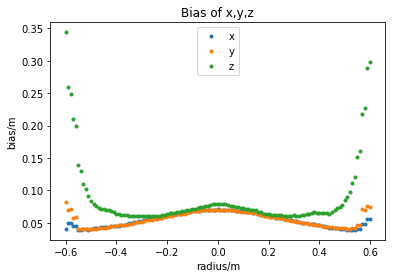

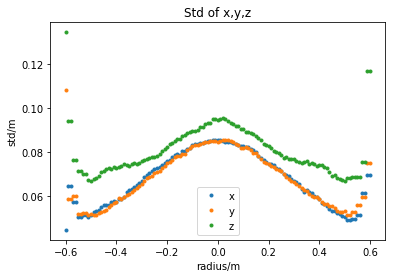

In [170]:
import os
def readfile(path):
    #path = r'../result_1t_1MeV_new'
    filenames=os.listdir(path)
    radius = np.arange(0.6001,-0.60,-0.01)
    data = []

    E_total = []
    x_total = []
    y_total = []
    z_total = []
    E_truth = []
    x_truth = []
    y_truth = []
    z_truth = []
    for index,i in enumerate(radius):
        filenames = os.listdir(path)
        for j in filenames:
            #print('%+.2f' % i)
            if ('%+.2f' % i) in j:
                #print(os.path.join(path, j))
                h = tables.open_file(os.path.join(path, j),'r')
                recondata = h.root.Recon
                E = recondata[:]['E_sph']
                taud = recondata[:]['tau_d']
                x = recondata[:]['x_sph']
                xt = recondata[:]['x_truth']
                y = recondata[:]['y_sph']
                yt = recondata[:]['y_truth']
                z = recondata[:]['z_sph']
                zt = recondata[:]['z_truth']
                xl = recondata[:]['x']
                h.close()
                E_total = np.hstack((E_total, E))
                x_total = np.hstack((x_total, x))
                y_total = np.hstack((y_total, y))
                z_total = np.hstack((z_total, z))
                
                x_truth = np.hstack((x_truth, np.zeros_like(x)))
                y_truth = np.hstack((y_truth, 0.2*radius[index]*np.ones_like(z)))
                z_truth = np.hstack((z_truth, radius[index]*np.ones_like(z)))
                
    return x,y,z,xt,yt,zt,x_total,y_total,z_total,x_truth, y_truth, z_truth

x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
x_ax = []
y_ax = []
z_ax = []

cnt = 0

x,y,z,xt,yt,zt,x_total,y_total,z_total,x_truth, y_truth, z_truth = readfile('../result_1t_pe_1MeV_new')

radius = np.arange(0.6001,-0.60,-0.01)
for i_index,i in enumerate(radius):
    index = ((np.abs(z_truth-i)<0.01) & \
            ((np.array(x_total)**2+np.array(y_total)**2)<2) & \
            (~np.isnan(x_total)))
    x_mean.append(np.mean(np.abs(x_total[index]-0)))
    y_mean.append(np.mean(np.abs(y_total[index]-i/5)))
    z_mean.append(np.mean(np.abs(z_total[index]-i)))
    x_std.append(np.std(x_total[index]-0))
    y_std.append(np.std(y_total[index]-i/5))
    z_std.append(np.std(z_total[index]-i))

plt.plot(radius, x_mean,'.')
plt.plot(radius, y_mean,'.')
plt.plot(radius, z_mean,'.')

plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('bias/m')
plt.title('Bias of x,y,z')
plt.show()
plt.plot(radius, x_std,'.')
plt.plot(radius, y_std,'.')
plt.plot(radius, z_std,'.')
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('std/m')
plt.title('Std of x,y,z')
plt.show()

In [142]:
for i_index,i in enumerate(radius):
    index = (((np.array(x_total)**2+np.array(y_total)**2)<2) & \
            (~np.isnan(x_total)))

[ 0.41186523  0.19726562  0.14624023 ... -0.31176758 -0.16064453
 -0.08465576]


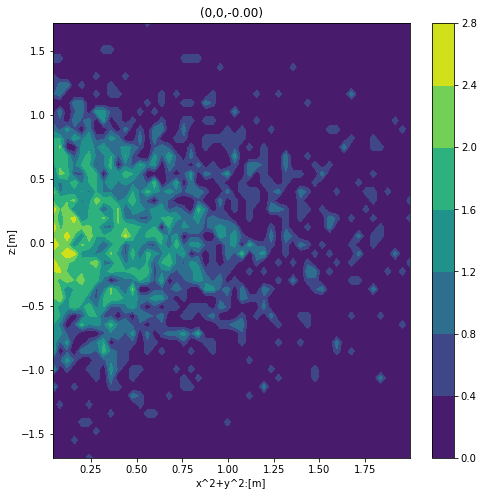

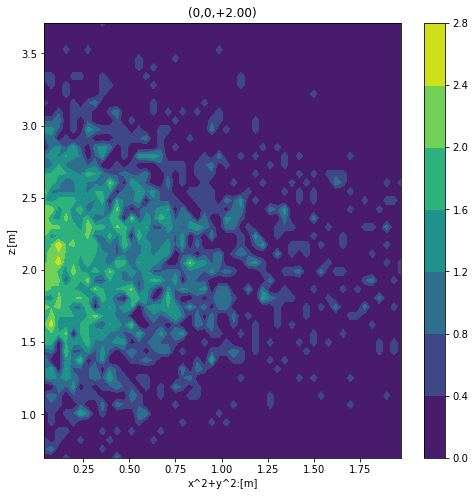

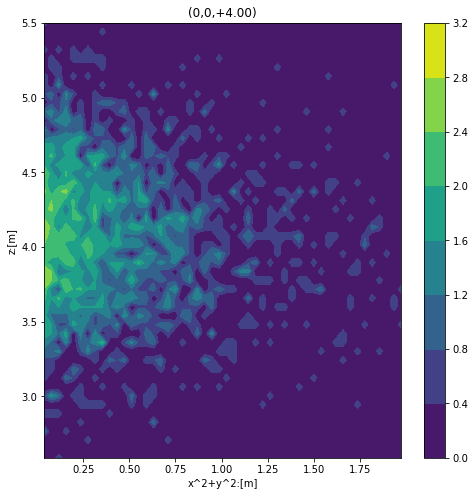

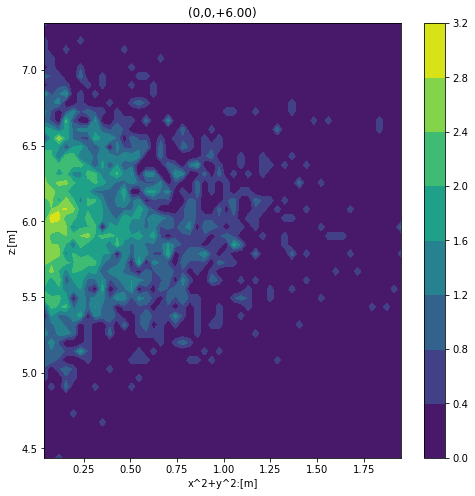

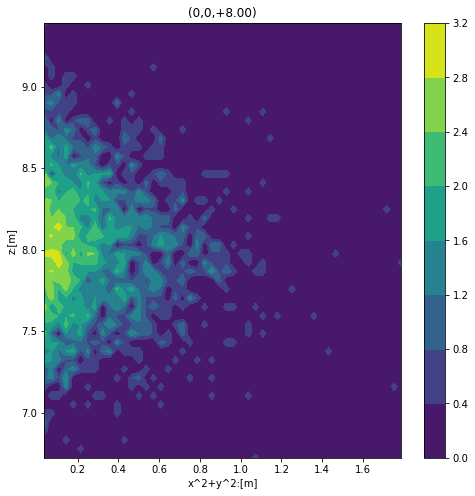

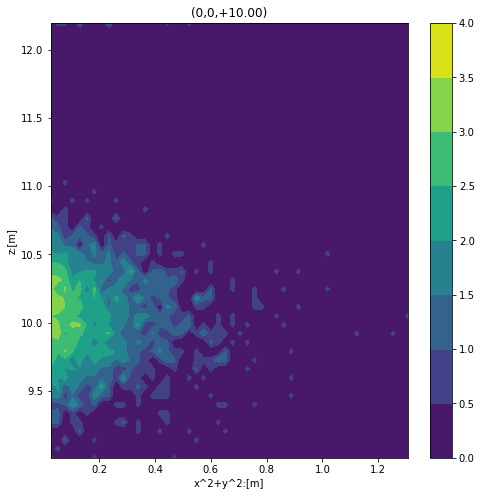

In [166]:
x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
for i in np.arange(-12,12.2,0.2):
    index = ((np.abs(z_truth-i)<0.1) & \
             ((np.array(x_total)**2+np.array(y_total)**2)<2) & \
            (~np.isnan(x_total)))
    if np.min(np.abs(i - np.arange(10,-2,-2)))<1e-3:
        plt.figure(figsize = (8,8))
        plt.subplot(1,1,1)
        r1 = x_total[index]**2 + y_total[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total[index]), bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.transpose(H1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)          
        plt.savefig('%+.2f.png' % i)
        
    x_mean.append(np.mean(np.abs(x_total[index]-x_truth[index])))
    y_mean.append(np.mean(np.abs(y_total[index]-y_truth[index])))
    z_mean.append(np.mean(np.abs(z_total[index]-z_truth[index])))
    x_std.append(np.std(x_total[index]-x_truth[index]))
    y_std.append(np.std(y_total[index]-y_truth[index]))
    z_std.append(np.std(z_total[index]-z_truth[index]))

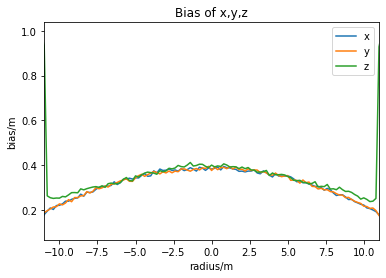

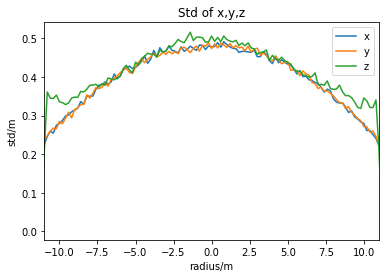

In [150]:
plt.plot(radius, x_mean)
plt.plot(radius, y_mean)
plt.plot(radius, z_mean)
plt.xlim([-11, 11])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('bias/m')
plt.title('Bias of x,y,z')
plt.show()
plt.plot(radius, x_std)
plt.plot(radius, y_std)
plt.plot(radius, z_std)
plt.xlim([-11, 11])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('std/m')
plt.title('Std of x,y,z')
plt.show()

# Result By Time

In [153]:
import os
radius = 0.00
path = r'../result_time_ft'
filenames=os.listdir(path)
radius = np.arange(12,-12.2,-0.2)
data = []

E_total = []
x_total = []
y_total = []
z_total = []
E_truth = []
x_truth = []
y_truth = []
z_truth = []
for index,i in enumerate(radius):
    filenames = os.listdir(path)
    for j in filenames:
        #print('%+.2f' % i)
        if ('%+.2f' % i) in j:
            #print(os.path.join(path, j))
            h = tables.open_file(os.path.join(path, j),'r')
            recondata = h.root.Recon
            E = recondata[:]['E_sph']
            taud = recondata[:]['tau_d']
            x = recondata[:]['x_sph']
            xt = recondata[:]['x_truth']
            y = recondata[:]['y_sph']
            yt = recondata[:]['y_truth']
            z = recondata[:]['z_sph']
            zt = recondata[:]['z_truth']
            xl = recondata[:]['x']
            h.close()
            E_total = np.hstack((E_total, E))
            x_total = np.hstack((x_total, x))
            y_total = np.hstack((y_total, y))
            z_total = np.hstack((z_total, z))
            x_truth = np.hstack((x_truth, np.zeros_like(x)))
            y_truth = np.hstack((y_truth, np.zeros_like(y)))
            z_truth = np.hstack((z_truth, radius[index]*np.ones_like(z)))

/opt/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


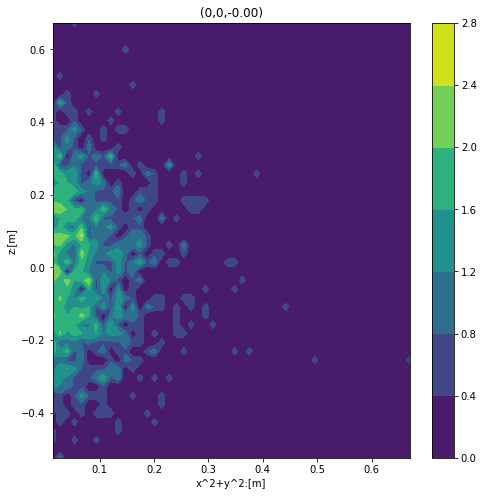

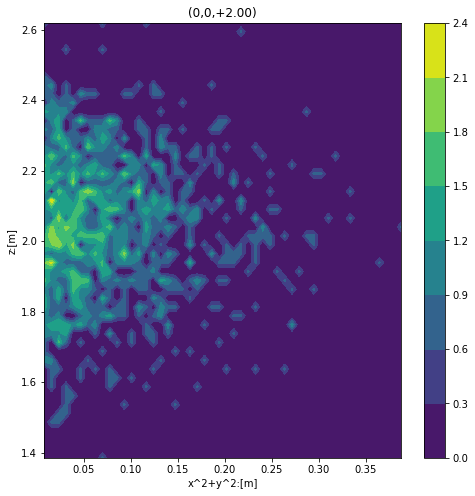

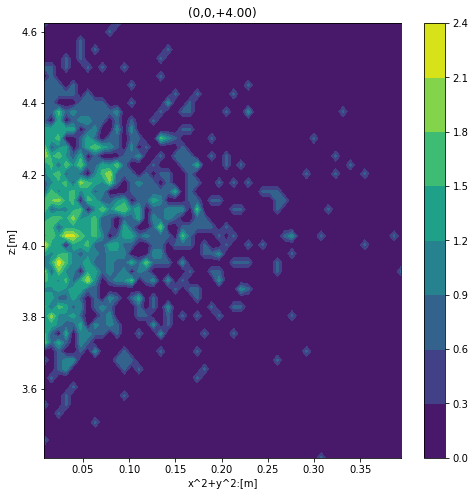

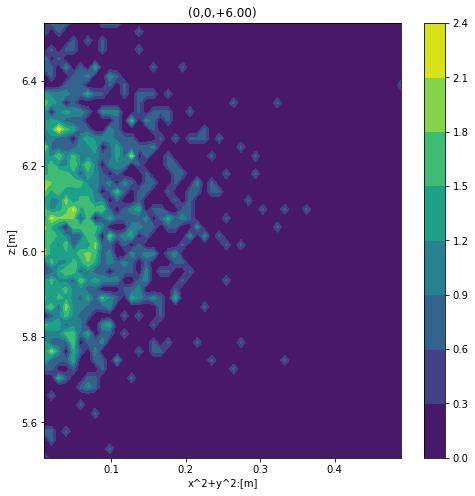

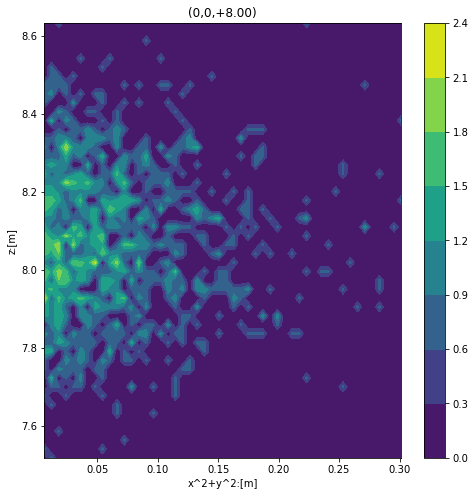

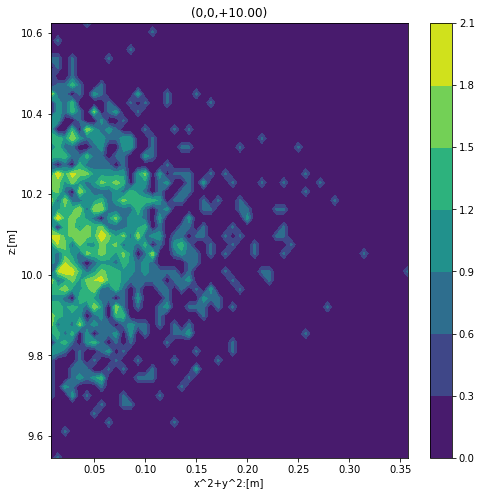

In [163]:
x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
for i in np.arange(-12,12.2,0.2):
    index = ((np.abs(z_truth-i)<0.1) & \
             ((np.array(x_total)**2+np.array(y_total)**2)<2) & \
             (np.abs(z_total) < 11) & \
            (~np.isnan(x_total)))
    if np.min(np.abs(i - np.arange(10,-2,-2)))<1e-3:
        plt.figure(figsize = (8,8))
        plt.subplot(1,1,1)
        r1 = x_total[index]**2 + y_total[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total[index]), bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.transpose(H1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)          
        plt.savefig('%+.2f.png' % i)
    x_mean.append(np.mean(np.abs(x_total[index]-x_truth[index])))
    y_mean.append(np.mean(np.abs(y_total[index]-y_truth[index])))
    z_mean.append(np.mean(np.abs(z_total[index]-z_truth[index])))
    x_std.append(np.std(x_total[index]-x_truth[index]))
    y_std.append(np.std(y_total[index]-y_truth[index]))
    z_std.append(np.std(z_total[index]-z_truth[index]))

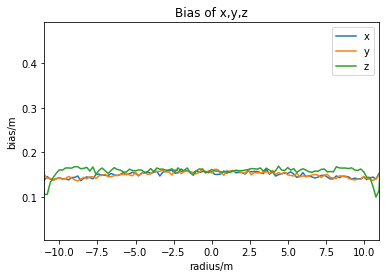

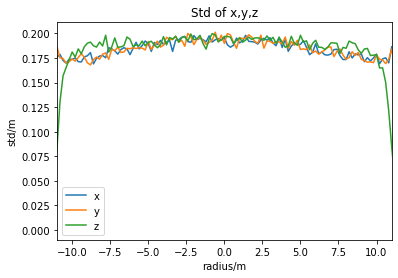

In [164]:
plt.plot(radius, x_mean)
plt.plot(radius, y_mean)
plt.plot(radius, z_mean)
plt.xlim([-11, 11])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('bias/m')
plt.title('Bias of x,y,z')
plt.show()
plt.plot(radius, x_std)
plt.plot(radius, y_std)
plt.plot(radius, z_std)
plt.xlim([-11, 11])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('std/m')
plt.title('Std of x,y,z')
plt.show()

# Conclusion  
+ Time improve much on resolution
+ In 5kt charge recon performs better than 1t

# Relationship between 5 kt and 1 t
If all photons are directly detected:
+ Legendre coefficient of *hit* should only differ by 0-th order
+ Legendre coefficient of *time* should be directly proportional 

#### Plan to choose
+ Use templates of 1 t and 5 kt individually
+ Use 5 kt templates smooth 1 t templates
+ Use 1 t templates without PMT response
+ Use 5 kt directly

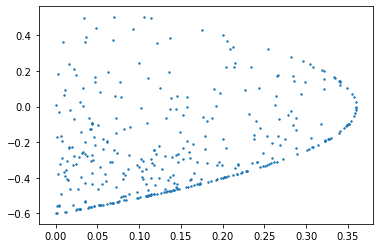

In [194]:
import os
radius = 0.00
path = r'../result_time_qt'
filenames=os.listdir(path)
data = []

h = tables.open_file(os.path.join(path, '1t_-0.30.h5'),'r')
recondata = h.root.Recon
E = recondata[:]['E_sph']
taud = recondata[:]['tau_d']
x = recondata[:]['x_sph']
xt = recondata[:]['x_truth']
y = recondata[:]['y_sph']
yt = recondata[:]['y_truth']
z = recondata[:]['z_sph']
zt = recondata[:]['z_truth']
h.close()

plt.scatter(x**2+y**2, z,s=2)

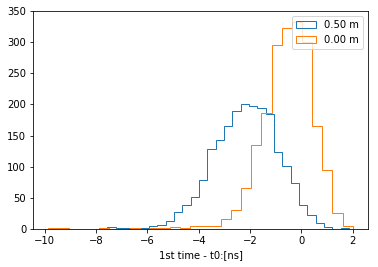

In [159]:
radius = '-0.50'
data = tables.open_file('../../result_1t_1MeV_new/1t_' + radius + '.h5','r')
recondata = data.root.Recon
t0 = recondata[:]['t0']
data.close()

raw = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/1MeV_015/1t_' + radius + '.h5','r')
rawdata = raw.root.GroundTruth
EventID = rawdata[:]['EventID']
ChannelID = rawdata[:]['ChannelID']
Time = rawdata[:]['PETime']
raw.close()

N = 2000
k1 = np.zeros(N)
for i in np.arange(N):
    t_offset = t0[i]
    time1 = Time[EventID==i+1]
    ch1 = ChannelID[EventID == i+1]
    k = time1-t_offset
    k1[i] = np.min(k[k>-10])
    
radius = '+0.00'
data = tables.open_file('../../result_1t_1MeV_new/1t_' + radius + '.h5','r')
recondata = data.root.Recon
t0 = recondata[:]['t0']
data.close()

raw = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/1MeV_015/1t_' + radius + '.h5','r')
rawdata = raw.root.GroundTruth
EventID = rawdata[:]['EventID']
ChannelID = rawdata[:]['ChannelID']
Time = rawdata[:]['PETime']
raw.close()

k2 = np.zeros(N)
for i in np.arange(N):
    t_offset = t0[i]
    time1 = Time[EventID==i+1]
    ch1 = ChannelID[EventID == i+1]
    k = time1-t_offset
    k2[i] = np.min(k[k>-10])
    
    
plt.hist(k1,bins=30,histtype='step')
plt.hist(k2,bins=30,histtype='step')
plt.legend(['0.50 m','0.00 m'])

plt.xlabel('1st time - t0:[ns]')
plt.show()

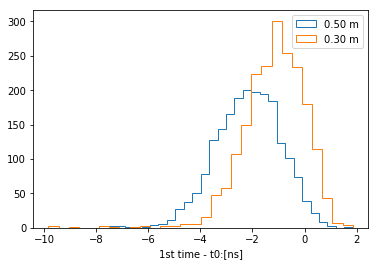

In [158]:
radius = '-0.50'
data = tables.open_file('../../result_1t_1MeV_new/1t_' + radius + '.h5','r')
recondata = data.root.Recon
t0 = recondata[:]['t0']
data.close()

raw = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/1MeV_015/1t_' + radius + '.h5','r')
rawdata = raw.root.GroundTruth
EventID = rawdata[:]['EventID']
ChannelID = rawdata[:]['ChannelID']
Time = rawdata[:]['PETime']
raw.close()

N = 2000
k1 = np.zeros(N)
for i in np.arange(N):
    t_offset = t0[i]
    time1 = Time[EventID==i+1]
    ch1 = ChannelID[EventID == i+1]
    k = time1-t_offset
    k1[i] = np.min(k[k>-10])
    
radius = '+0.30'
data = tables.open_file('../../result_1t_1MeV_new/1t_' + radius + '.h5','r')
recondata = data.root.Recon
t0 = recondata[:]['t0']
data.close()

raw = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/1MeV_015/1t_' + radius + '.h5','r')
rawdata = raw.root.GroundTruth
EventID = rawdata[:]['EventID']
ChannelID = rawdata[:]['ChannelID']
Time = rawdata[:]['PETime']
raw.close()

k2 = np.zeros(N)
for i in np.arange(N):
    t_offset = t0[i]
    time1 = Time[EventID==i+1]
    ch1 = ChannelID[EventID == i+1]
    k = time1-t_offset
    k2[i] = np.min(k[k>-10])
    
    
plt.hist(k1,bins=30,histtype='step')
plt.hist(k2,bins=30,histtype='step')
plt.legend(['0.50 m','0.30 m'])
plt.xlabel('1st time - t0:[ns]')
plt.show()

/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in less


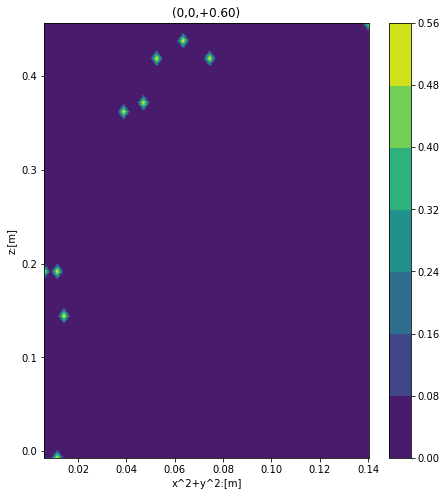

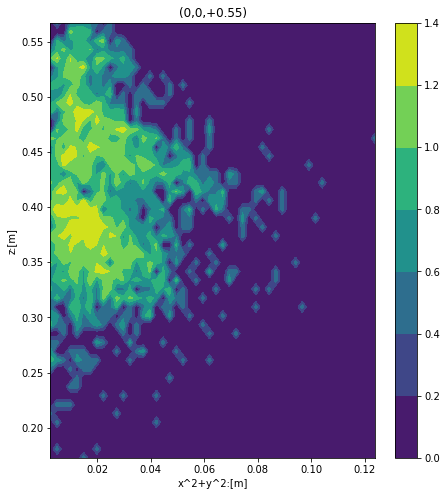

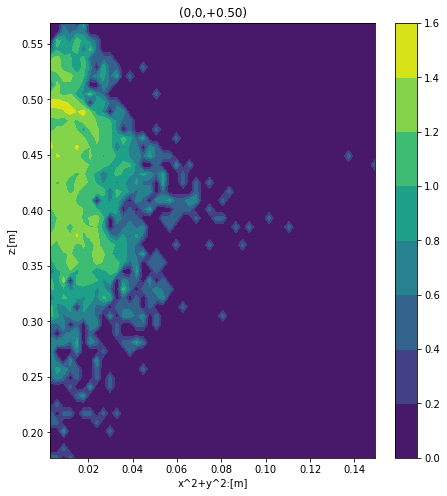

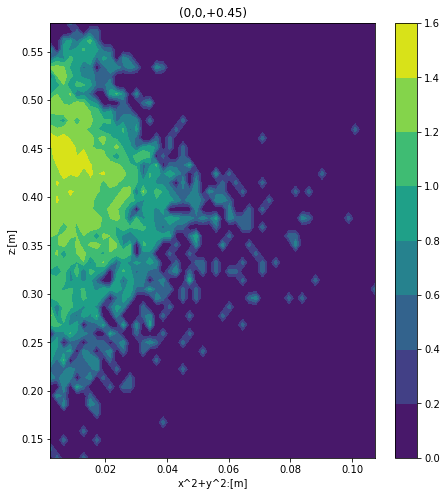

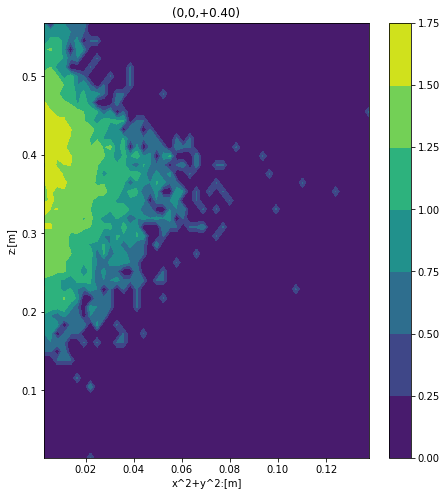

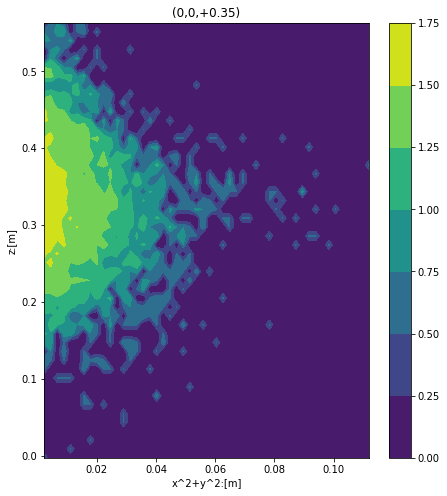

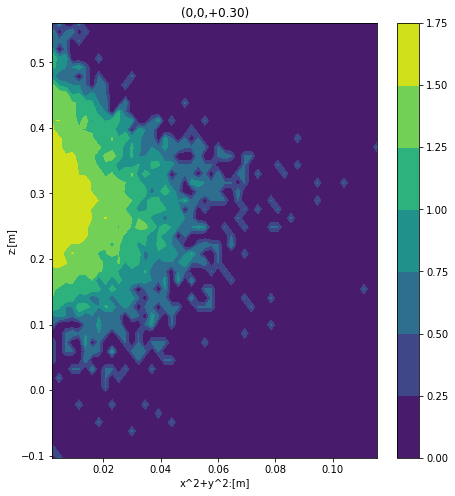

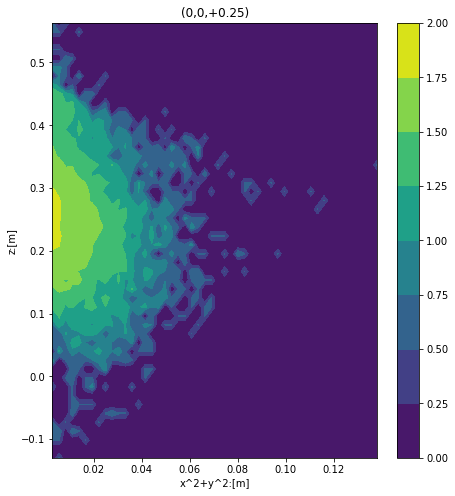

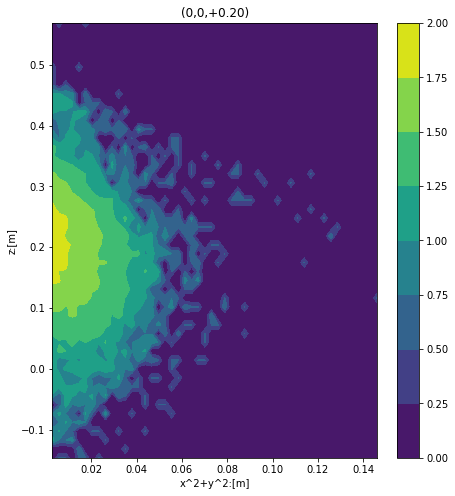

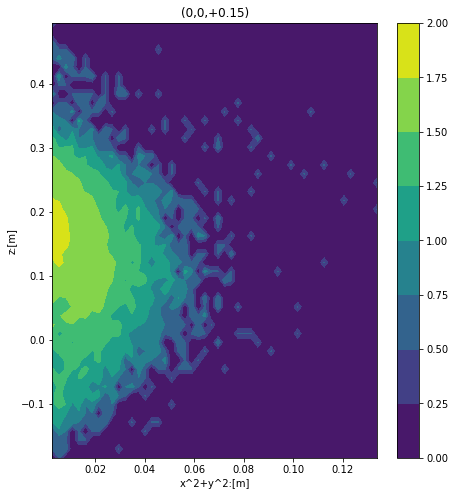

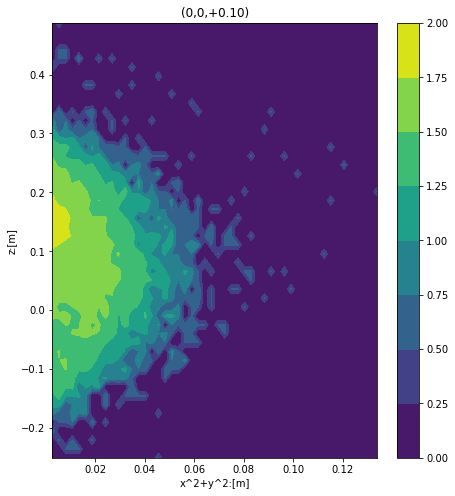

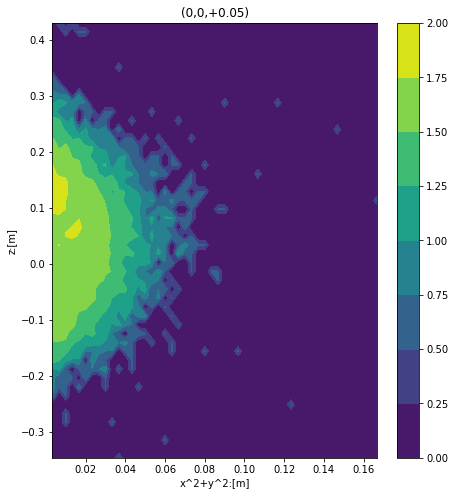

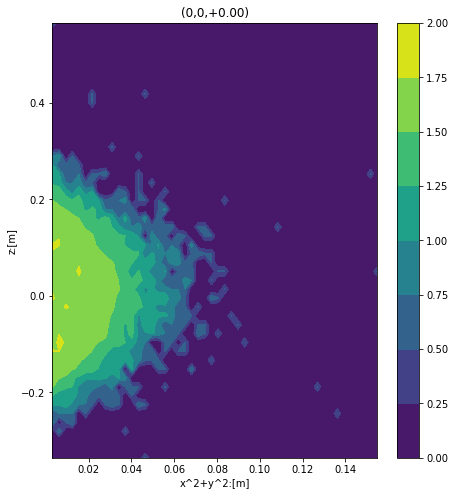

In [186]:
import os
def readfile(path):
    #path = r'../result_1t_1MeV_new'
    filenames=os.listdir(path)
    radius = np.arange(0.6001,-0.60,-0.01)
    data = []

    E_total = []
    x_total = []
    y_total = []
    z_total = []
    E_truth = []
    x_truth = []
    y_truth = []
    z_truth = []
    for index,i in enumerate(radius):
        filenames = os.listdir(path)
        for j in filenames:
            #print('%+.2f' % i)
            if ('%+.2f' % i) in j:
                #print(os.path.join(path, j))
                h = tables.open_file(os.path.join(path, j),'r')
                recondata = h.root.Recon
                E = recondata[:]['E_sph']
                taud = recondata[:]['tau_d']
                x = recondata[:]['x_sph']
                xt = recondata[:]['x_truth']
                y = recondata[:]['y_sph']
                yt = recondata[:]['y_truth']
                z = recondata[:]['z_sph']
                zt = recondata[:]['z_truth']
                xl = recondata[:]['x']
                h.close()
                E_total = np.hstack((E_total, E))
                x_total = np.hstack((x_total, x))
                y_total = np.hstack((y_total, y))
                z_total = np.hstack((z_total, z))
                x_truth = np.hstack((x_truth, np.zeros_like(x)))
                y_truth = np.hstack((y_truth, np.zeros_like(y)))
                z_truth = np.hstack((z_truth, radius[index]*np.ones_like(z)))
                
    return x,y,z,xt,yt,zt,x_total,y_total,z_total,x_truth,y_truth,z_truth

x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
x_ax = []
y_ax = []
z_ax = []

cnt = 0

x1,y1,z1,xt1,yt1,zt1,x_total1,y_total1,z_total1,x_truth1,y_truth1,z_truth1 = readfile('../result_1t_pe_1MeV_new')

for i in np.arange(0.6001,-0.60,-0.01):
    index = ((np.abs(z_truth1-i)<0.005) & \
             ((np.array(x_total1)**2+np.array(y_total1)**2)<2) & \
            (~np.isnan(x_total1)))
    if np.min(np.abs(i - np.arange(0.6001,0.00,-0.05)))<1e-3:
        cnt = cnt+1
        plt.figure(figsize = (16,8), num=cnt)
        plt.subplot(1,2,1)
        r1 = x_total1[index]**2 + y_total1[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total1[index]), bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.log(np.transpose(H1)+1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)
    plt.show()

    x_ax.append(x_truth[index][0])
    y_ax.append(y_truth[index][0])
    z_ax.append(z_truth[index][0])
    x_mean.append(np.mean(np.abs(x_total[index]-x_truth[index])))
    y_mean.append(np.mean(np.abs(y_total[index]-y_truth[index])))
    z_mean.append(np.mean(np.abs(z_total[index]-z_truth[index])))
    x_std.append(np.std(x_total[index]-x_truth[index]))
    y_std.append(np.std(y_total[index]-y_truth[index]))
    z_std.append(np.std(z_total[index]-z_truth[index]))


In [32]:
import numpy as np
import scipy, h5py
import scipy.stats as stats
import os,sys
import tables
import scipy.io as scio
import matplotlib.pyplot as plt
import uproot, argparse
from scipy.optimize import minimize
from scipy import interpolate
from numpy.polynomial import legendre as LG
from scipy import special
from scipy.linalg import norm
import warnings



def r2c(c):
    v = np.zeros(3)
    v[2] = c[0] * np.cos(c[1]) #z
    rho = c[0] * np.sin(c[1])
    v[0] = rho * np.cos(c[2]) #x
    v[1] = rho * np.sin(c[2]) #y
    return v

def c2r(c):
    v = np.zeros(3)
    v[0] = norm(c)
    v[1] = np.arccos(c[2]/(v[0]+1e-6))
    v[2] = np.arctan(c[1]/(c[0]+1e-6)) + (c[0]<0)*np.pi/2
    return v

x = [0,-4,-3]
print(c2r(x))
print(r2c(c2r(x)))

[ 5.          2.21429729 -1.57079608]
[ 1.00000011e-06 -4.00000045e+00 -2.99999940e+00]


In [17]:
7.68*np.sin(0.86)*np.cos(1.03)

2.996364540662916

In [23]:
np.arccos(3/5)

0.9272952180016123